In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
n = 10
A, B = 1, 2
y_0 = np.sqrt(2)
z_0 = 3 * y_0 / 4
h = (B - A) / n

In [28]:
nodes = np.linspace(A, B, n + 1)
f1 = lambda x, y, z: z
f2 = lambda x, y, z: ( -(z * z / y) + 2 * (z / x))

In [29]:
def euler_method(f_1, f_2, start_values, left, right, n):
    step_size = (right - left) / n
    x_nodes = np.linspace(left, right, n)
    grid_axis = [
        [start_values[0]],
        [start_values[1]]
    ]
    for i in range(n):
        grid_axis[0].append(
            grid_axis[0][-1] + step_size * f_1(x_nodes[i], grid_axis[0][-1], grid_axis[1][-1])
        )
        grid_axis[1].append(
            grid_axis[1][-1] + step_size * f_2(x_nodes[i], grid_axis[0][-1], grid_axis[1][-1])
        )
    return grid_axis

In [30]:
grid = euler_method(f1, f2, [y_0, z_0], A, B, n)

In [31]:
print(*grid, sep='\n')

[np.float64(1.4142135623730951), np.float64(1.5202795795510773), np.float64(1.64015884547782), np.float64(1.7728543996382706), np.float64(1.9173317039538214), np.float64(2.072593759757583), np.float64(2.237722654135062), np.float64(2.4118970036222933), np.float64(2.5943943316392404), np.float64(2.784585210237429), np.float64(2.981923656249476)]
[np.float64(1.0606601717798214), np.float64(1.198792659267426), np.float64(1.3269555416045067), np.float64(1.4447730431555073), np.float64(1.5526205580376178), np.float64(1.6512889437747902), np.float64(1.741743494872315), np.float64(1.8249732801694705), np.float64(1.9019087859818873), np.float64(1.9733844601204689), np.float64(2.040127804568348)]


In [32]:
n = 10
grid = euler_method(f1, f2, [y_0, z_0], A, B, n)
nodes = np.linspace(A, B, n + 1)
x_axis_for_draw = nodes
y_axis_for_draw = grid[0]
y_axis1_for_draw = grid[1]

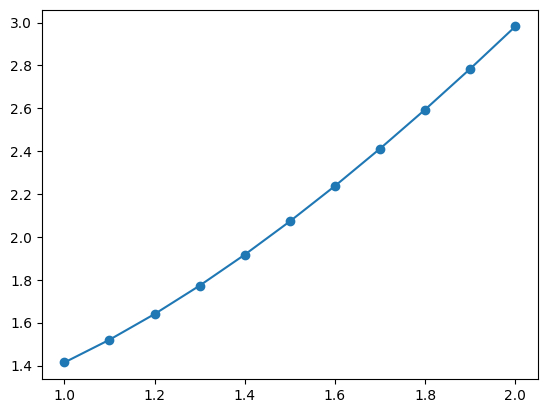

In [38]:
plt.plot(x_axis_for_draw, y_axis_for_draw, 'o-')
plt.show()

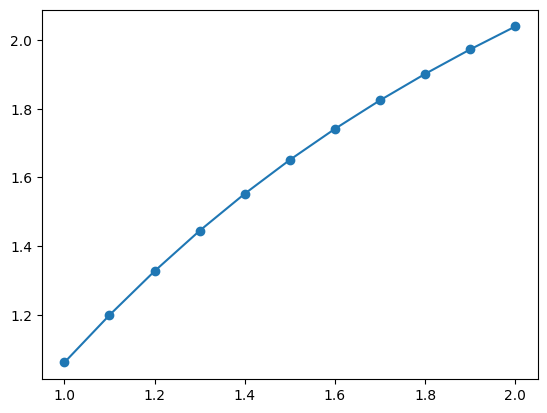

In [39]:
plt.plot(x_axis_for_draw, y_axis1_for_draw, 'o-')
plt.show()

x = 1.00, y = 1.414214
x = 1.10, y = 1.655635
x = 1.20, y = 1.931198
x = 1.30, y = 2.244318
x = 1.40, y = 2.598750
x = 1.50, y = 2.998625
x = 1.60, y = 3.448488
x = 1.70, y = 3.953336
x = 1.80, y = 4.518670
x = 1.90, y = 5.150537
x = 2.00, y = 5.855591


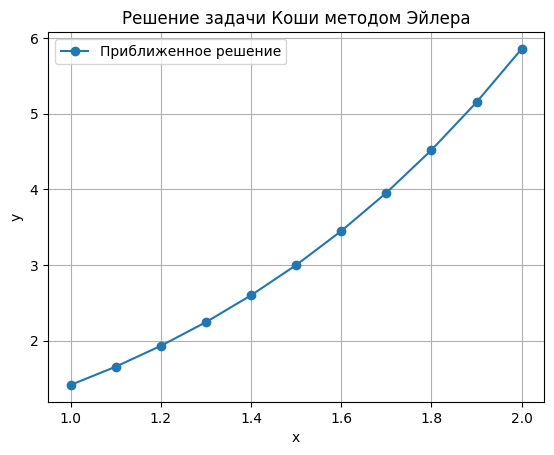

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, a, b, y0, h):
    """
    Решает задачу Коши y' = f(x, y) на отрезке [a, b] с начальным условием y(a) = y0
    с использованием явного метода Эйлера.

    Параметры:
    f - функция f(x, y)
    a, b - начало и конец отрезка
    y0 - начальное значение y(a)
    h - шаг

    Возвращает:
    x - массив значений x
    y - массив значений y
    """
    # Создаем массив для x
    x = np.arange(a, b + h, h)
    
    # Создаем массив для y и инициализируем начальное значение
    y = np.zeros(len(x))
    y[0] = y0
    
    # Применяем метод Эйлера
    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])
    
    return x, y

# Пример использования
def f(x, y):
    return x + y  # Пример функции f(x, y)

a = 1  # Начало отрезка
b = 2  # Конец отрезка
y0 = y_0  # Начальное условие y(a) = y0
h = 0.1  # Шаг

x, y = euler_method(f, a, b, y0, h)

# Вывод результатов
for i in range(len(x)):
    print(f"x = {x[i]:.2f}, y = {y[i]:.6f}")

# Построение графика
plt.plot(x, y, 'o-', label='Приближенное решение')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Решение задачи Коши методом Эйлера')
plt.legend()
plt.grid(True)
plt.show()


x = 0.00, y = 1.000000
x = 0.10, y = 1.122222
x = 0.20, y = 1.269136
x = 0.30, y = 1.443484
x = 0.40, y = 1.648316
x = 0.50, y = 1.887018
x = 0.60, y = 2.163353
x = 0.70, y = 2.481503
x = 0.80, y = 2.846115
x = 0.90, y = 3.262350
x = 1.00, y = 3.735944


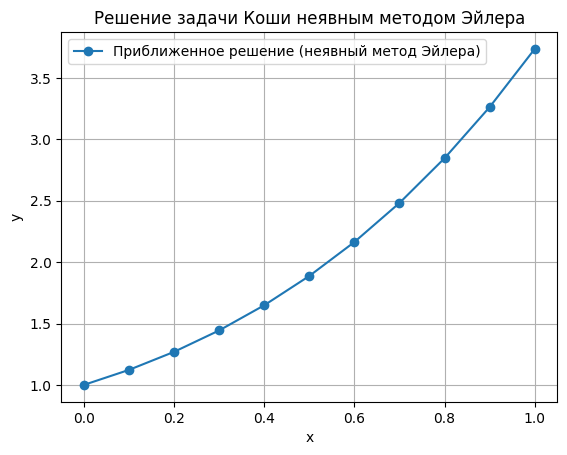

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve  # Для решения нелинейных уравнений

def implicit_euler_method(f, a, b, y0, h):
    """
    Решает задачу Коши y' = f(x, y) на отрезке [a, b] с начальным условием y(a) = y0
    с использованием неявного метода Эйлера.

    Параметры:
    f - функция f(x, y)
    a, b - начало и конец отрезка
    y0 - начальное значение y(a)
    h - шаг

    Возвращает:
    x - массив значений x
    y - массив значений y
    """
    # Создаем массив для x
    x = np.arange(a, b + h, h)
    
    # Создаем массив для y и инициализируем начальное значение
    y = np.zeros(len(x))
    y[0] = y0
    
    # Применяем неявный метод Эйлера
    for i in range(1, len(x)):
        # Определяем функцию для решения нелинейного уравнения
        def equation(y_next):
            return y_next - y[i-1] - h * f(x[i], y_next)
        
        # Решаем уравнение методом Ньютона
        y[i] = fsolve(equation, y[i-1])[0]
    
    return x, y

# Пример использования
def f(x, y):
    return x + y  # Пример функции f(x, y)

a = 0  # Начало отрезка
b = 1  # Конец отрезка
y0 = 1  # Начальное условие y(a) = y0
h = 0.1  # Шаг

x, y = implicit_euler_method(f, a, b, y0, h)

# Вывод результатов
for i in range(len(x)):
    print(f"x = {x[i]:.2f}, y = {y[i]:.6f}")

# Построение графика
plt.plot(x, y, 'o-', label='Приближенное решение (неявный метод Эйлера)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Решение задачи Коши неявным методом Эйлера')
plt.legend()
plt.grid(True)
plt.show()


x = 1.00, y = 1.414214, z = 1.060660
x = 1.10, y = 1.520280, z = 1.193243
x = 1.20, y = 1.639604, z = 1.316540
x = 1.30, y = 1.771258, z = 1.430250
x = 1.40, y = 1.914283, z = 1.534799
x = 1.50, y = 2.067763, z = 1.631002
x = 1.60, y = 2.230863, z = 1.719819
x = 1.70, y = 2.402845, z = 1.802212
x = 1.80, y = 2.583066, z = 1.879066
x = 1.90, y = 2.770973, z = 1.951157
x = 2.00, y = 2.966089, z = 2.019153


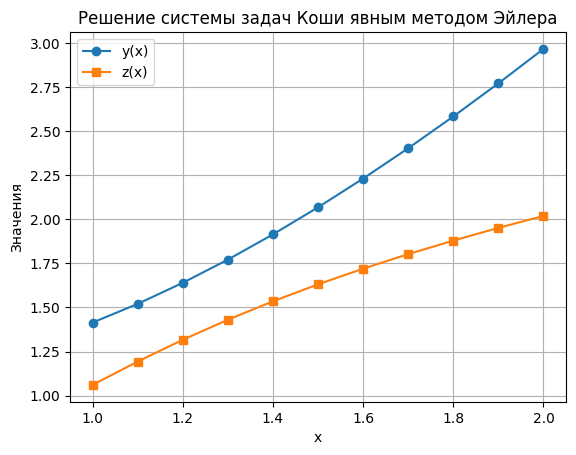

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler_system(f, g, a, b, y0, z0, h):
    """
    Решает систему задач Коши с использованием явного метода Эйлера.

    Параметры:
    f - функция для y': f(x, y, z)
    g - функция для z': g(x, y, z)
    a, b - начало и конец отрезка
    y0, z0 - начальные условия
    h - шаг

    Возвращает:
    x - массив значений x
    y - массив значений y
    z - массив значений z
    """
    x = np.arange(a, b + h, h)
    y = np.zeros(len(x))
    z = np.zeros(len(x))
    y[0] = y0
    z[0] = z0

    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1], z[i-1])
        z[i] = z[i-1] + h * g(x[i-1], y[i-1], z[i-1])

    return x, y, z

# Определение функций системы
def f(x, y, z):
    return z  # y' = z

def g(x, y, z):
    return -(z**2 / y) + 2 * (z / x)  # z' = -(z^2 / y) + 2(z / x)

# Начальные условия
a = 1
b = 2
y0 = np.sqrt(2)
z0 = 3 * y0 / 4
h = 0.1

# Решение системы
x, y, z = explicit_euler_system(f, g, a, b, y0, z0, h)

# Вывод результатов
for i in range(len(x)):
    print(f"x = {x[i]:.2f}, y = {y[i]:.6f}, z = {z[i]:.6f}")

# Построение графиков
plt.plot(x, y, 'o-', label='y(x)')
plt.plot(x, z, 's-', label='z(x)')
plt.xlabel('x')
plt.ylabel('Значения')
plt.title('Решение системы задач Коши явным методом Эйлера')
plt.legend()
plt.grid(True)
plt.show()


x = 1.00, y = 1.414214, z = 1.060660
x = 1.10, y = 1.532662, z = 1.184481
x = 1.20, y = 1.662611, z = 1.299495
x = 1.30, y = 1.803229, z = 1.406174
x = 1.40, y = 1.953752, z = 1.505240
x = 1.50, y = 2.113502, z = 1.597492
x = 1.60, y = 2.281874, z = 1.683721
x = 1.70, y = 2.458339, z = 1.764656
x = 1.80, y = 2.642434, z = 1.840949
x = 1.90, y = 2.833751, z = 1.913171
x = 2.00, y = 3.031933, z = 1.981811


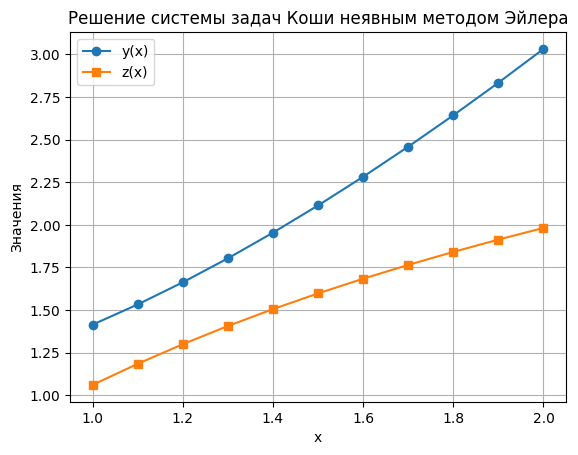

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def implicit_euler_system(f, g, a, b, y0, z0, h):
    """
    Решает систему задач Коши с использованием неявного метода Эйлера.

    Параметры:
    f - функция для y': f(x, y, z)
    g - функция для z': g(x, y, z)
    a, b - начало и конец отрезка
    y0, z0 - начальные условия
    h - шаг

    Возвращает:
    x - массив значений x
    y - массив значений y
    z - массив значений z
    """
    x = np.arange(a, b + h, h)
    y = np.zeros(len(x))
    z = np.zeros(len(x))
    y[0] = y0
    z[0] = z0

    for i in range(1, len(x)):
        # Определяем систему уравнений для y[i] и z[i]
        def equations(vars):
            y_next, z_next = vars
            eq1 = y_next - y[i-1] - h * f(x[i], y_next, z_next)
            eq2 = z_next - z[i-1] - h * g(x[i], y_next, z_next)
            return [eq1, eq2]

        # Решаем систему уравнений
        y[i], z[i] = fsolve(equations, [y[i-1], z[i-1]])

    return x, y, z

# Определение функций системы
def f(x, y, z):
    return z  # y' = z

def g(x, y, z):
    return -(z**2 / y) + 2 * (z / x)  # z' = -(z^2 / y) + 2(z / x)

# Начальные условия
a = 1
b = 2
y0 = np.sqrt(2)
z0 = 3 * y0 / 4
h = 0.1

# Решение системы
x, y, z = implicit_euler_system(f, g, a, b, y0, z0, h)

# Вывод результатов
for i in range(len(x)):
    print(f"x = {x[i]:.2f}, y = {y[i]:.6f}, z = {z[i]:.6f}")

# Построение графиков
plt.plot(x, y, 'o-', label='y(x)')
plt.plot(x, z, 's-', label='z(x)')
plt.xlabel('x')
plt.ylabel('Значения')
plt.title('Решение системы задач Коши неявным методом Эйлера')
plt.legend()
plt.grid(True)
plt.show()
